In [25]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [26]:
# write your code here
import sqlite3

with sqlite3.connect('../db.sqlite3') as conn:
    products_df = pd.read_sql_query("SELECT * FROM restaurant_product", conn)
    orders_df = pd.read_sql_query("SELECT * FROM restaurant_order", conn)
    order_items_df = pd.read_sql_query("SELECT * FROM restaurant_orderitem", conn)


combined_df = (
    order_items_df.
    merge(orders_df, right_on='id', left_on="order_id")
    .merge(products_df, right_on='id', left_on="product_id")
)

combined_df.to_csv('combined_data.csv', index=False)

print(f"Number of rows: {combined_df.shape[0]}")


Number of rows: 74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

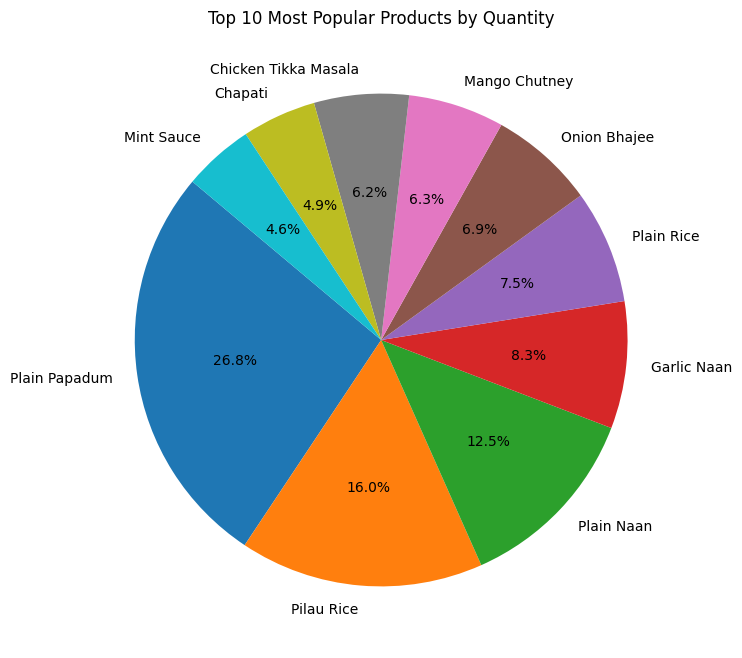

In [27]:
# write your code here
product_sales = combined_df.groupby('name')['quantity'].sum()

top_10_products = product_sales.nlargest(10)

plt.figure(figsize=(10, 8))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%',startangle=140)
plt.title('Top 10 Most Popular Products by Quantity')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

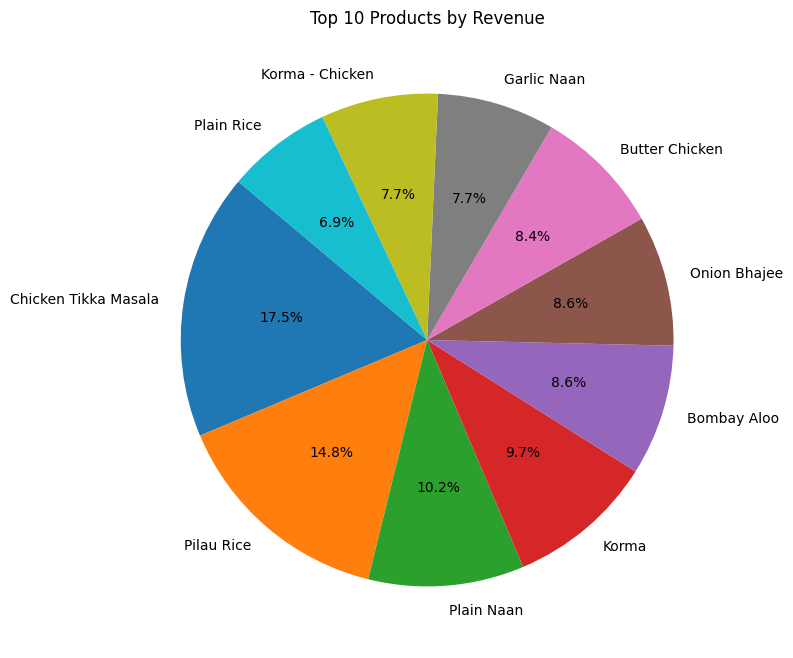

In [31]:
# write your code here
combined_df['item_price'] = combined_df['quantity'] * combined_df['price']

product_revenue = combined_df.groupby('name')['item_price'].sum()

top_10_products_revenue = product_revenue.nlargest(10)

plt.figure(figsize=(10, 8))
plt.pie(top_10_products_revenue, labels=top_10_products_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Products by Revenue')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

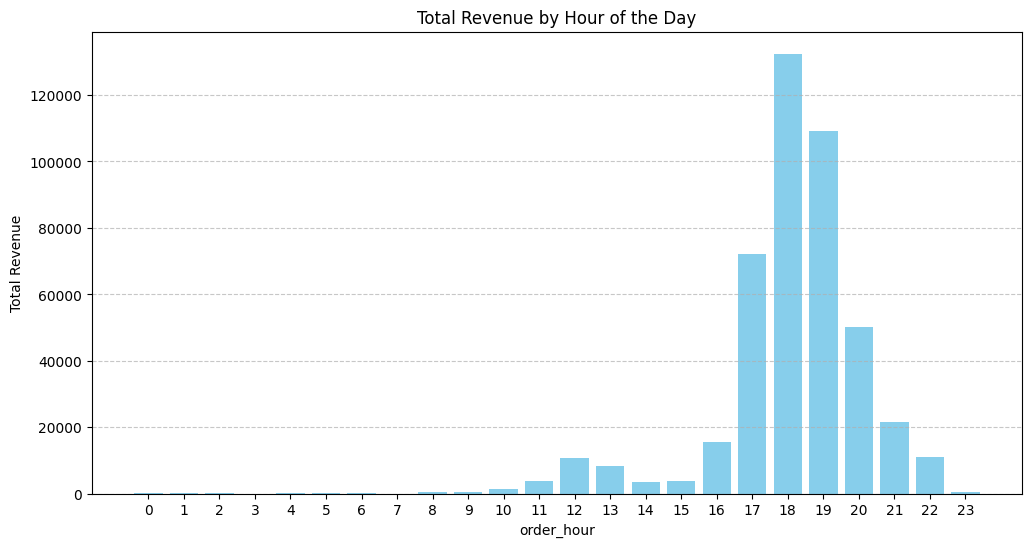

In [35]:
# write your code here
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

combined_df['order_hour'] = combined_df['datetime'].dt.hour

hourly_revenue = combined_df.groupby('order_hour')['item_price'].sum()

plt.figure(figsize=(12, 6))
plt.bar(hourly_revenue.index, hourly_revenue.values, color='skyblue')
plt.xlabel('order_hour')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Hour of the Day')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

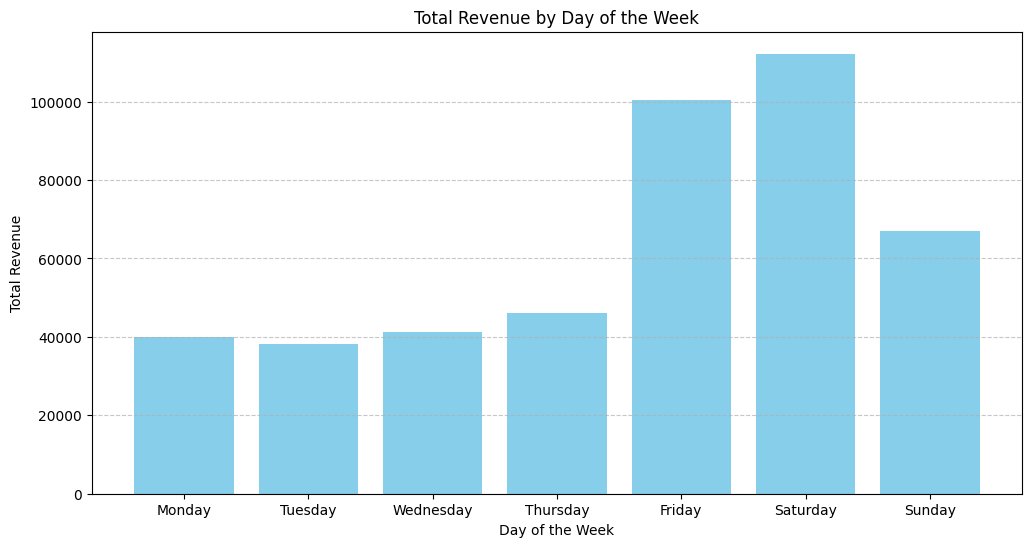

In [37]:
# write your code here
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

combined_df['Order Day Of The Week'] = combined_df['datetime'].dt.day_name()

daily_revenue = combined_df.groupby('Order Day Of The Week')['item_price'].sum()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = daily_revenue.reindex(days_order)

plt.figure(figsize=(12, 6))
plt.bar(daily_revenue.index, daily_revenue.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()